## 데이터 불러오기

In [2]:
# 한글깨짐
import platform
import matplotlib.pyplot as plt

os = platform.system()

# Windows
if os == 'Windows':
    plt.rc('font', family= 'Malgun Gothic')

else:
    print(f'{os} is not set')

In [3]:
import pandas as pd

score=pd.read_csv('final_musinsa_review_data_5점이상 긍정.csv')
#score.head(1)

In [4]:
score['group'].value_counts()

group
긍정(평점) & 긍정(모델)    99794
긍정(평점) & 부정(모델)    11414
부정(평점) & 긍정(모델)     3119
부정(평점) & 부정(모델)      339
Name: count, dtype: int64

In [5]:
shoes=score[score['group']=='부정(평점) & 부정(모델)']
shoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 880 to 113800
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 308 non-null    float64
 1   name                       339 non-null    object 
 2   date                       339 non-null    object 
 3   product                    339 non-null    object 
 4   detail                     339 non-null    object 
 5   score                      339 non-null    float64
 6   review                     339 non-null    object 
 7   help_cnt                   339 non-null    int64  
 8   style_cnt                  45 non-null     float64
 9   type                       339 non-null    object 
 10  category                   339 non-null    object 
 11  sex                        339 non-null    object 
 12  price                      339 non-null    int64  
 13  tag                        339 non-null    object 

In [6]:
shoes=shoes[['product','score','review','category']]
shoes.head()

,product,score,review,category
880,아디케인 플립플랍 - 화이트 / IE9697,2.0,무진장 세일때 1만7천원정도에 구매해서 저렴히 잘 구매했다 싶었는데\n신은 첫날 2...,슬리퍼
1048,아디케인 플립플랍 - 화이트 / IE9697,3.0,세일할때 샀는데 아주 만족해요~~ 진짜 저렴하게 잘 샀어요,슬리퍼
1076,아디케인 플립플랍 - 화이트 / IE9697,3.0,와이프 동네 마실용으로 좋은가격에 잘 산거깉아요. 푹신하진 않지만 그냥 적당한 착화...,슬리퍼
1096,아디케인 플립플랍 - 화이트 / IE9697,3.0,245 맞나요\n굉장히 크네요\n교환비때문에 그냥 신어야겠어요\n평소245인분들23...,슬리퍼
1153,아디케인 플립플랍 - 화이트 / IE9697,3.0,음.. 일단 저는 240을 신어서 245로 구매했습니다! 발 길이는 잘 맞는데 발등...,슬리퍼


In [7]:
shoes.reset_index(drop=True,inplace=True)

In [8]:
shoes.tail()

,product,score,review,category
334,아딜렛 클로그 - 화이트 / FY8970,3.0,가성비로 신기 좋고 편합니다 디자인도 깔끔해서 좋습니다,샌들
335,아딜렛 클로그 - 화이트 / FY8970,3.0,가격대비 만족해요 저렴하게 샀어 너무너무 좋아요 ~^^,샌들
336,아딜렛 클로그 - 화이트 / FY8970,3.0,선물로 샀는데 골프공 같기도 하면서 귀엽네요ㅋㅋ 잘 쓸게용,샌들
337,아딜렛 클로그 - 화이트 / FY8970,3.0,걍 보통입니다 보통보통 보통 슬리퍼임 근데 때가 잘탐,샌들
338,ALMERIA CA2101 BLACK,3.0,탄탄한 가죽소재\n이쁜듯하나\n발이 커보이는 ㅠ\n평소235 신는데 240구매했더니...,샌들


## LDA (mecab 형태소 분석기) : 시각화

In [9]:
# Mecab 호출
from konlpy.tag import Mecab

mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [10]:
# 정규 표현식
shoes['review']=shoes['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
shoes['review']=shoes['review'].str.replace("\n", "") # \n 제거
shoes['review']=shoes['review'].str.replace(" +", " ") # 다중공백 제거
shoes['review']

0      무진장 세일때 1만7천원정도에 구매해서 저렴히 잘 구매했다 싶었는데신은 첫날 2시간...
1                       세일할때 샀는데 아주 만족해요~~ 진짜 저렴하게 잘 샀어요
2      와이프 동네 마실용으로 좋은가격에 잘 산거깉아요. 푹신하진 않지만 그냥 적당한 착화...
3           245 맞나요굉장히 크네요교환비때문에 그냥 신어야겠어요평소245인분들235사세요
4      음.. 일단 저는 240을 신어서 245로 구매했습니다! 발 길이는 잘 맞는데 발등...
                             ...                        
334                       가성비로 신기 좋고 편합니다 디자인도 깔끔해서 좋습니다
335                       가격대비 만족해요 저렴하게 샀어 너무너무 좋아요 ~^^
336                     선물로 샀는데 골프공 같기도 하면서 귀엽네요ㅋㅋ 잘 쓸게용
337                        걍 보통입니다 보통보통 보통 슬리퍼임 근데 때가 잘탐
338    탄탄한 가죽소재이쁜듯하나발이 커보이는 ㅠ평소235 신는데 240구매했더니왕발 같아보영요ㅠ
Name: review, Length: 339, dtype: object

In [11]:
# NNG: 일반 명사
# VA: 형용사
## MAG : 일반 부사
# XR: 어근
# SL: 외국어(CS,TRASH)

mecab_pos=[]
for sentence in shoes['review']:
    pos=mecab.pos(sentence)
    main_words=[word_pos[0] for word_pos in pos if word_pos[1] in ('NNG','VA','XR','SL') ] # 일반명사, 형용사, 어근, 외국어
    main_words_str= ','.join(main_words)
    mecab_pos.append(main_words_str)
shoes['mecab_pos']=pd.DataFrame(mecab_pos)


shoes.head()

,product,score,review,category,mecab_pos
0,아디케인 플립플랍 - 화이트 / IE9697,2.0,무진장 세일때 1만7천원정도에 구매해서 저렴히 잘 구매했다 싶었는데신은 첫날 2시간...,슬리퍼,"무진장,세일,때,정도,구매,저렴,구매,첫날,신고,속살,발등,폼,흉,사이즈,매전,매장..."
1,아디케인 플립플랍 - 화이트 / IE9697,3.0,세일할때 샀는데 아주 만족해요~~ 진짜 저렴하게 잘 샀어요,슬리퍼,"세일,때,만족,저렴"
2,아디케인 플립플랍 - 화이트 / IE9697,3.0,와이프 동네 마실용으로 좋은가격에 잘 산거깉아요. 푹신하진 않지만 그냥 적당한 착화...,슬리퍼,"와이프,동네,마실,좋,가격,적당,착화,가격,깡패"
3,아디케인 플립플랍 - 화이트 / IE9697,3.0,245 맞나요굉장히 크네요교환비때문에 그냥 신어야겠어요평소245인분들235사세요,슬리퍼,"크,요교,환비,평소,인분"
4,아디케인 플립플랍 - 화이트 / IE9697,3.0,음.. 일단 저는 240을 신어서 245로 구매했습니다! 발 길이는 잘 맞는데 발등...,슬리퍼,"구매,발,길이,발등,부분,예쁘"


In [189]:
# shoes['mecab_pos'].value_counts() # NNP 고유명사 # 사이즈, 와이드,다이소, 콜라보, 스몰, 퀄리티, 저희, 저, 뭐, 리뷰...

### 워드 클라우드

In [12]:
# 워드클라우드
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

font_path = 'C:/Windows/Fonts/malgun.ttf'

stopwords=set(['때','같','발','신','등','생각','있','정도','부분','제품','구매','과정','전','벗','음','어','양말','달','트랩','청','다','친구','집','여름','후기'])

shoes['filtered_main_pos'] = shoes['mecab_pos'].apply(lambda x: [word for word in x if word not in stopwords])
all_nouns=' '.join([''.join(nouns) for nouns in shoes['filtered_main_pos']])

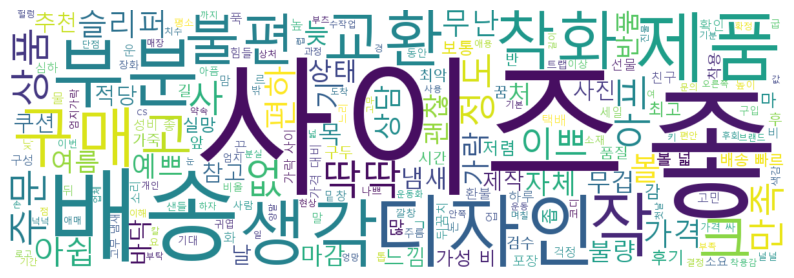

In [15]:

# 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=1200, height=400, background_color='white').generate(all_nouns)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### TF-IDF 로 자주 사용되는 키워드 시각화

- tf: 하나의 문장(문서)에서 특정 단어가 등장하는 횟수
- idf : 문서 빈도의 역수 (적은 문장에 등장할수록 큰 값, 많은 문장에 등장할수록 작은 값)
신발 카테코리 모든 리뷰에 "이 신발 사이즈 ~ "라는  말이 들어갈 경우 신발, 사이즈라는 단어는 리뷰 내에서 중요도가 낮음(의미 없이 사용되는 단어)을 판단하고자 ..

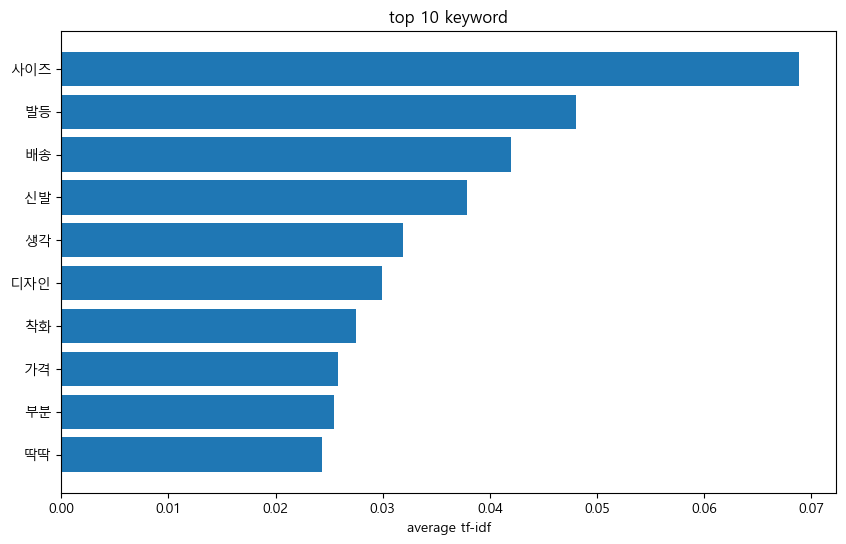

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# main_pos 컬럼의 문자열을 리스트로 변환
corpus=shoes['mecab_pos'].values.tolist()

tfidf= TfidfVectorizer().fit(corpus)
tfidf_matrix=tfidf.transform(corpus).toarray()

tfidf.vocabulary_ # 입력된 단어와 고유 인덱스
tfidf_matrix.shape # 문서수, 단어수 (339, 593)
tdidf_feature=tfidf.get_feature_names_out() # 단어 목록

cos_df=pd.DataFrame(cosine_similarity(tfidf_matrix)) # 유사도 계산
tfidf_matrix_df=pd.DataFrame(tfidf_matrix, columns=tdidf_feature, index=shoes.index) # tfidf_matrix 데이터프레임
df_transpose=tfidf_matrix_df.T # 행렬전환
df_transpose['average'] = df_transpose.mean(axis=1) # 평균 tf-idf

top_10=df_transpose.sort_values(by='average',ascending=False).head(10) # top 10 keyword


# top 10 keyword 시각화
plt.figure(figsize=(10,6))
plt.barh(top_10.index,top_10['average'])
plt.title('top 10 keyword')
plt.xlabel('average tf-idf')
plt.gca().invert_yaxis() #y축 반전
plt.show()

## LDA with mecab : 최적의 토픽 개수, LDA

- 토큰화 형태소 분석기 mecab, 불용어 제거(키워드 추출), 바이그랩 및 트라이그램 처리, 단어 길이 한 자리수 이하 제거
- 적정한 토픽의 개수 찾기: perplexity(모델이 보유 데이터를 얼마나 잘 예측하는지 측정하는 값, 낮을수록 좋다),gensim 라이브러리

- sentencepiece

In [17]:
# 함수 정의
def split_words(row):
    return row.split(',')

# 'mecab_pos' 열 리스트 분할
shoes['mecab'] = shoes['mecab_pos'].apply(split_words) 
shoes['mecab']

# 단어 한 자리수 제거..?  크 의 경우 크다를 의미, 좋 의 경우 좋은가격, 좋아요 의 의미 한자리 수 제거에 신중할 필요가 있어 보인다.

0      [무진장, 세일, 때, 정도, 구매, 저렴, 구매, 첫날, 신고, 속살, 발등, 폼...
1                                        [세일, 때, 만족, 저렴]
2                   [와이프, 동네, 마실, 좋, 가격, 적당, 착화, 가격, 깡패]
3                                    [크, 요교, 환비, 평소, 인분]
4                                [구매, 발, 길이, 발등, 부분, 예쁘]
                             ...                        
334                               [가성, 비, 좋, 디자인, 깔끔, 좋]
335                                  [가격, 대비, 만족, 저렴, 좋]
336                                  [선물, 골프공, 같, 귀엽, 용]
337                          [보통, 보통, 보통, 보통, 슬리퍼, 때, 탐]
338                              [탄탄, 가죽, 소재, 구매, 왕발, 같]
Name: mecab, Length: 339, dtype: object

### 적정 토픽 수 
- perplexity : 모델이 얼마나 잘 예측하는지 나타내는 지표, 낮은 값은 모델이 문서에서 나타나는 단어를 더 잘 예측함을 의미
- coherence: 발견된 토픽이 얼마나 의미있는지 나타내는 지표, 높은 값은 토픽 내 단어들이 서로 관련성이 높음을 의미

In [21]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# 컬럼 리스트로 반환
columns_as_lists =shoes['mecab']
review_list=shoes['mecab'].values.tolist() #shoes['mecab_pos'].apply(split_words)


# vector화
dictionary = corpora.Dictionary(review_list)
dictionary.filter_extremes(no_below=2, no_above=0.05)  # 2개의 문서 미만으로 등장하는 단어 제외, 전체 5%이상으로 자주 등장하는 단어 제외
corpus = [dictionary.doc2bow(text) for text in review_list] #corpus 자체가 list 형태


print(corpus[337]) # 몇 번째 단어가 몇 번 나왔는지
print(dictionary[66])

[(9, 1), (212, 4)]
빠르


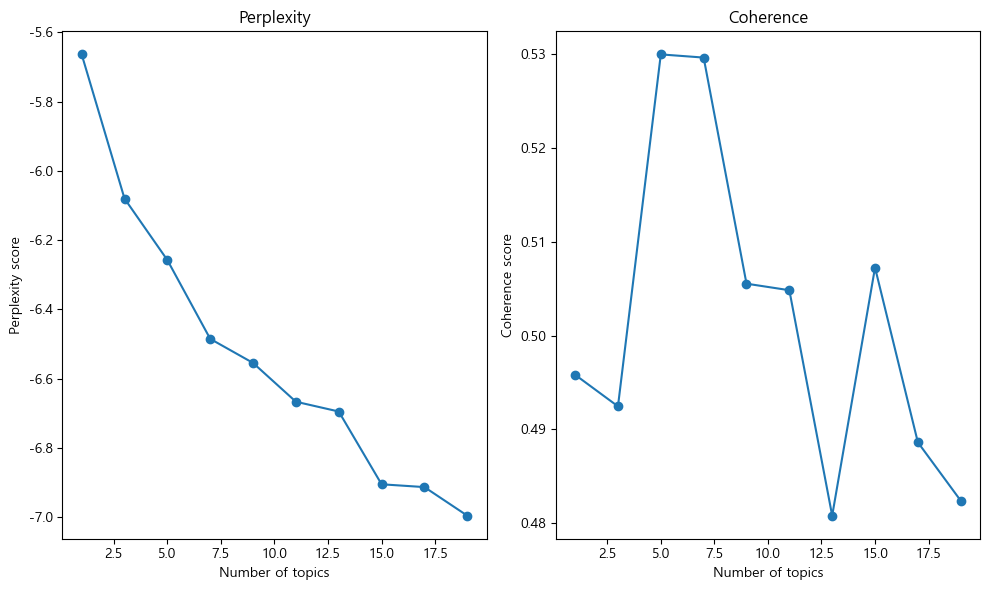

In [22]:
start_topic = 1
end_topic = 20
step = 2
topic_range = range(start_topic, end_topic + 1, step)

# Perplexity 계산
perplexity_values = []
for i in topic_range:
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

# Coherence 계산
coherence_scores = []
for i in topic_range:
    lda_model = LdaModel(corpus, num_topics=i, id2word=dictionary, passes=15)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=columns_as_lists, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)


fig, axes = plt.subplots(1, 2, figsize=(10, 6))
x = topic_range
plt.rcParams['axes.unicode_minus'] = False

# Perplexity subplot
axes[0].plot(x, perplexity_values, marker='o')
axes[0].set_xlabel('Number of topics')
axes[0].set_ylabel('Perplexity score') 
axes[0].set_title('Perplexity') #마이너스 값이 나왔다...좋은 결과는 아닌듯!


# Coherence subplot
axes[1].plot(topic_range, coherence_scores, marker='o')
axes[1].set_xlabel('Number of topics')
axes[1].set_ylabel('Coherence score')
axes[1].set_title('Coherence')


plt.tight_layout()
plt.show()


In [26]:
# 최적의 토픽 수 선택 # coherence 를 이용
optimal_co = topic_range[coherence_scores.index(max(coherence_scores))]
print("최적토픽 수 : ", optimal_co)


최적토픽 수 :  5


### LDA 학습

In [31]:

# 최적의 토픽 수(5개)로 최종 모델 생성
fin_lda = LdaModel(corpus, num_topics=optimal_co, id2word=dictionary, passes=1,iterations=500) # 말뭉치 학습 횟수 15회

for topic_id, topic_words in fin_lda.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.031*"상품" + 0.028*"발볼" + 0.020*"교환" + 0.020*"비" + 0.020*"이쁘" + 0.014*"부츠" + 0.014*"ㄱ" + 0.014*"다르" + 0.014*"최악" + 0.014*"참고"
Topic 1: 0.032*"상담" + 0.026*"주문" + 0.019*"제작" + 0.019*"비" + 0.016*"전화" + 0.016*"날" + 0.016*"만족" + 0.016*"엄지" + 0.016*"돈" + 0.014*"사이"
Topic 2: 0.032*"정도" + 0.030*"교환" + 0.016*"발볼" + 0.016*"상품" + 0.016*"냄새" + 0.014*"상태" + 0.014*"처음" + 0.014*"마감" + 0.014*"쿠션" + 0.012*"신사"
Topic 3: 0.017*"주문" + 0.017*"저렴" + 0.017*"꿈" + 0.017*"슬리퍼" + 0.017*"보통" + 0.017*"신" + 0.017*"느낌" + 0.017*"볼" + 0.017*"대비" + 0.014*"아쉽"
Topic 4: 0.036*"편하" + 0.025*"신기" + 0.022*"냄새" + 0.022*"무난" + 0.018*"아쉽" + 0.015*"참고" + 0.015*"자체" + 0.015*"실망" + 0.015*"마음" + 0.015*"감"


In [393]:

# 최적의 토픽 수(11개)로 최종 모델 생성 
#lda_model = LdaModel(corpus, num_topics=11, id2word=dictionary, passes=15, iterations=500) # 말뭉치 학습 횟수 15회 #iterations:주제할당업데이트하는 반복 횟수

#for topic_id, topic_words in lda_model.print_topics():
#    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.047*"상담" + 0.038*"제작" + 0.029*"전화" + 0.024*"늦" + 0.024*"주문" + 0.024*"신사" + 0.024*"정도" + 0.024*"신" + 0.019*"환불" + 0.019*"힘들"
Topic 1: 0.065*"여름" + 0.059*"정도" + 0.041*"저렴" + 0.040*"만족" + 0.036*"자체" + 0.024*"주문" + 0.024*"볼" + 0.024*"신기" + 0.018*"세일" + 0.018*"대비"
Topic 2: 0.045*"보통" + 0.036*"슬리퍼" + 0.036*"늦" + 0.027*"신어" + 0.025*"검수" + 0.024*"맘" + 0.018*"발목" + 0.018*"느낌" + 0.018*"감안" + 0.018*"길"
Topic 3: 0.073*"이쁘" + 0.048*"상품" + 0.026*"무겁" + 0.025*"비" + 0.024*"발볼" + 0.023*"상태" + 0.023*"반품" + 0.023*"뒤꿈치" + 0.020*"포장" + 0.017*"굽"
Topic 4: 0.058*"최고" + 0.057*"신사" + 0.029*"앞" + 0.029*"낮" + 0.027*"품질" + 0.025*"처음" + 0.022*"샌들" + 0.022*"만족" + 0.022*"부족" + 0.022*"슬리퍼"
Topic 5: 0.064*"마감" + 0.042*"아쉽" + 0.040*"다음" + 0.033*"트랩" + 0.030*"가성" + 0.030*"비" + 0.025*"밑창" + 0.025*"돈" + 0.025*"개인" + 0.025*"다운"
Topic 6: 0.041*"친구" + 0.041*"실망" + 0.038*"추천" + 0.021*"신기" + 0.021*"무난" + 0.021*"오른쪽" + 0.021*"꿈" + 0.021*"굳" + 0.021*"고급" + 0.021*"신"
Topic 7: 0.050*"편하" + 0.050*"예쁘" + 0.050*"아쉽" + 0.04

topic 1 : 제작 상품이라 늦었고, 환불이 힘들었다? 신기 힘들었다?  
topic 2: 세일해서 비교적 저렴하게 사서 만족한다  
topic 3: 검수에 불만족한듯하다. 보통이다.  
topic 4: 슬리퍼에 대한 리뷰이다.  
topic 5: 마감이 아쉽다. 가성비다  
topic 6: 무난하다. 친구에게 추천하기는 힘들 듯 하다.    
topic 7: 편하고 예쁘다. 불량이지만 싸니깐 참는다?  
topic 8: 가성비. 무난. 적당  
topic 9:발볼에 대한 언급. 반품에 소요 시간이 걸렸다..?  
topic 10: 고무 냄새, 본드 냄새, 무난한 장화  

In [33]:
#문서별 토픽 할당
topic_list = []

for n in range(len(corpus)):
    doc_topic = fin_lda[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    topic_list.append([n, topic_most_pr, topic_pr])
    
topic_df = pd.DataFrame(topic_list, columns=['Ｄｏｃ—ｎｕｍ','Topic', 'Percentage'])

# 실제 review 내용과 join
topic_df = topic_df.join(shoes['review'])  

pd.set_option('display.max_colwidth', 1000)
topic_df.head(11)

,Ｄｏｃ—ｎｕｍ,Topic,Percentage,review
0,0,3,0.969949,무진장 세일때 1만7천원정도에 구매해서 저렴히 잘 구매했다 싶었는데신은 첫날 2시간 신고 속살이 보이게 발등이 다 까져서 메디폼 계속 붙이다가 지금 2주가 지났는데도 흉이 졌어요 ㅠㅠ저는 정사이즈 230이라 사이즈가 어떨지 몰라구매전 매장에서 신어보니 매장에선 225부터 나오는데 직원분이 크게 나왔다며 반다운을 추천하더라구요225 신으니 뒷꿈치가 딱 맞고 235는 뒷꿈치 약간 여유있는데 반해 텅끈 부분이 너무 높아 발등이 엄청 널널하더군요제가 슬리퍼류 딱 맞게 신는거 별로 선호하지않기도 하고 어차피 무신사는 235부터 나와서 235 주문했더니 역시나 좀 커요~(아마 좀 커서 쓸려서 발등이 다친것 같기도 하고요)소재 자체가 엄청 딱딱하고 가장자리부분이 올라오는 디자인이라 너무 욕실화같아서 한번 신고 다친뒤론 그냥 넣어놨어요무진장 세일때 퓨마 쪼리도 1만4천원정도로 저렴하길래 한번 구매해보니 엄청 부들부들하고 푹신해서 그것만 주구장창 신고 있어요아디다스.... 운동화는 좋아도 슬리퍼는 사지마세요 ㅠ
1,1,3,0.798395,세일할때 샀는데 아주 만족해요~~ 진짜 저렴하게 잘 샀어요
2,2,2,0.730582,와이프 동네 마실용으로 좋은가격에 잘 산거깉아요. 푹신하진 않지만 그냥 적당한 착화감..일단 모든것은 가격이 깡패네요.
3,3,1,0.596267,245 맞나요굉장히 크네요교환비때문에 그냥 신어야겠어요평소245인분들235사세요
4,4,0,0.730360,음.. 일단 저는 240을 신어서 245로 구매했습니다! 발 길이는 잘 맞는데 발등 부분이 너무 떠서 예쁘지가 않아요ㅠ
5,5,3,0.863870,이번 주말에 비 온다고 해서 급하게 주문했는데 타이밍 적당하게 도착했어요 사이즈 적절해요
6,6,0,0.883309,진짜 배송까지의 과정 이렇게 짜증나는 제품은 처음이에요 배송지 변경이 두달걸림 그리고 cs 연락 안됩니다
7,7,2,0.863734,컷팅한부분에서. 조금 아쉬운 부분이 있지만 비오는 날 신기에 아주 적당합니다 너무길지도않고. 너무짧지도않아요
8,8,4,0.797495,생각보다 무겁지만 예쁘긴 예쁩니다.. 장마 때 잘 신고다닐게욥
9,9,4,0.884153,비오는 날에 무난하게 신기 좋습니당 ~~ 코디하기도 쉬워여
